In [1]:
from pylab import *
from classy import *

Version:  0.0.71


## Slicing the board pics

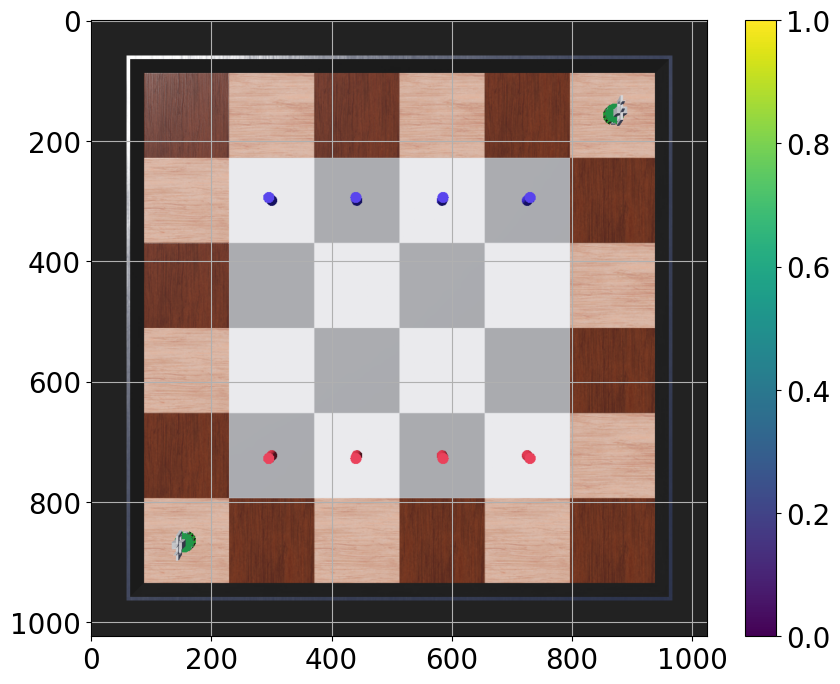

In [2]:
im=imread('images/image_20251203_074812_070004.png')
imshow(im)
colorbar()

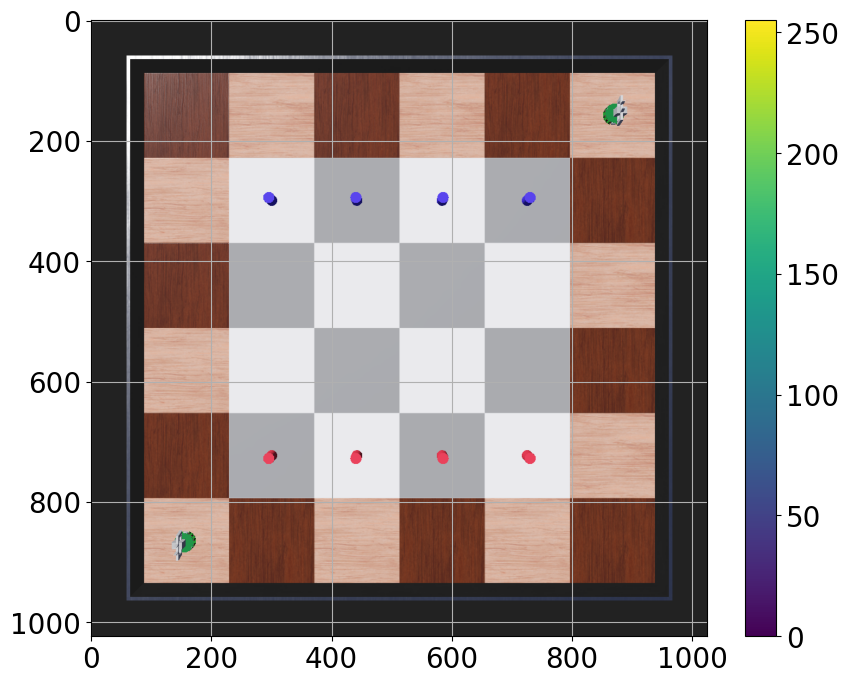

In [3]:
im=imread('images/image_20251203_074812_070004.png')
im=(im*255).astype(uint8)
imshow(im)
colorbar()

### guessing some sizes/locations to slice

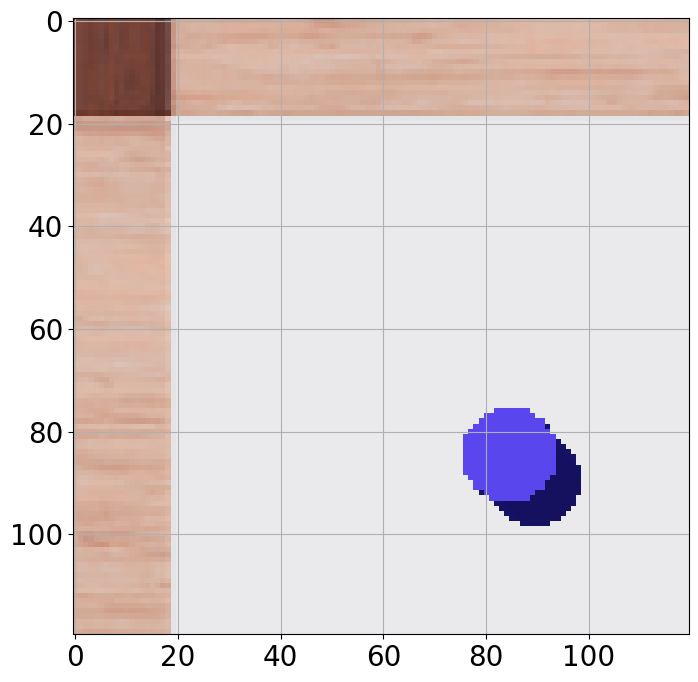

In [72]:
start_r,start_c=210,210
rows_per_square,cols_per_square=120,120

r,c=0,0  # in square coordinates, r=0,1,2,3 c=0,1,2,3

r1=start_r+rows_per_square*r
r2=start_r+rows_per_square*(r+1)
c1=start_c+cols_per_square*c
c2=start_c+cols_per_square*(c+1)

subimage=im[r1:r2,c1:c2]
imshow(subimage)

### a little off, so tweak until it works

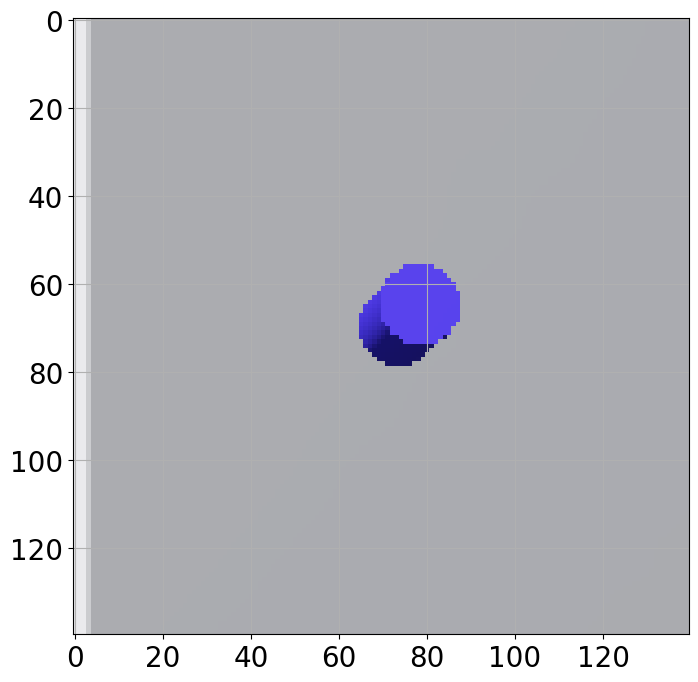

In [5]:
start_r,start_c=230,230
rows_per_square,cols_per_square=140,140

r,c=0,3  # in square coordinates, r=0,1,2,3 c=0,1,2,3

r1=start_r+rows_per_square*r
r2=start_r+rows_per_square*(r+1)
c1=start_c+cols_per_square*c
c2=start_c+cols_per_square*(c+1)

subimage=im[r1:r2,c1:c2]
imshow(subimage)

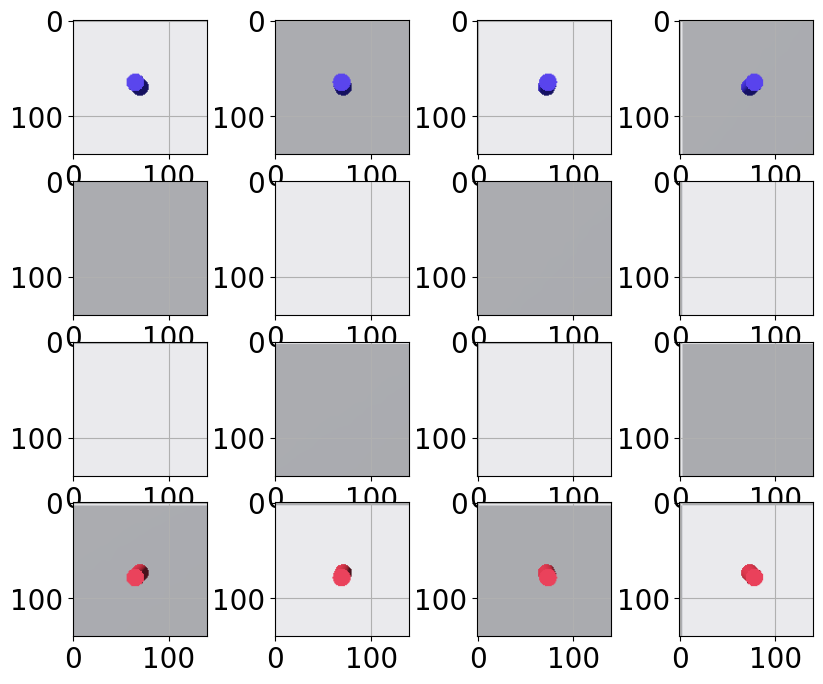

In [6]:
count=1
for r in range(4):
    for c in range(4):
        r1=start_r+rows_per_square*r
        r2=start_r+rows_per_square*(r+1)
        c1=start_c+cols_per_square*c
        c2=start_c+cols_per_square*(c+1)
        
        subimage=im[r1:r2,c1:c2]
        subplot(4,4,count)
        imshow(subimage)
        count+=1

## Save to files, organized for classy

In [7]:
from Game import *
state=Board(4,4)
for i in [0,1,2,3]:
    state[i]=2
for i in [12,13,14,15]:
    state[i]=1
state

Version:  0.3.15


 2  2  2  2 
 0  0  0  0 
 0  0  0  0 
 1  1  1  1 

In [8]:
import os
os.makedirs('images/myboard/player1',exist_ok=True)
os.makedirs('images/myboard/player2',exist_ok=True)
os.makedirs('images/myboard/blank',exist_ok=True)

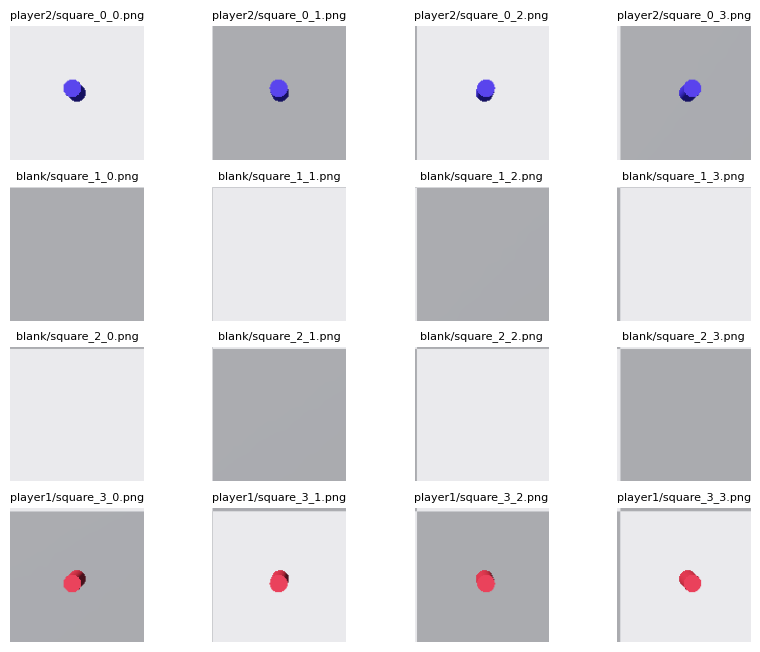

In [9]:
count=1
players=['blank','player1','player2']
for r in range(4):
    for c in range(4):
        r1=start_r+rows_per_square*r
        r2=start_r+rows_per_square*(r+1)
        c1=start_c+cols_per_square*c
        c2=start_c+cols_per_square*(c+1)
        
        subimage=im[r1:r2,c1:c2]
        subplot(4,4,count)
        imshow(subimage)
        count+=1

        
        fname=f'images/myboard/{players[state[r,c]]}/square_{r}_{c}.png'
        title(fname[15:],size=8)
        axis('off')
        imsave(fname,subimage.astype(uint8))
        

## Learn a classifier

In [10]:
from classy import *

In [12]:
images=image.load_images('images/myboard')

[player1]: 4 files found
[blank]: 8 files found
[player2]: 4 files found


In [13]:
# make sure that target 0 = blank, target 1 = player 1, etc...
images=remap_targets(images,new_target_names=['blank','player1','player2'])
summary(images)

Images
16 images of shape (140, 140, 4)
Target values given.
Target names: 'blank', 'player1', 'player2'
[blank]: 8 files
[player1]: 4 files
[player2]: 4 files


In [14]:
images.data[0]

array([[[234, 234, 237, 255],
        [234, 234, 237, 255],
        [234, 234, 237, 255],
        ...,
        [170, 171, 175, 255],
        [170, 171, 175, 255],
        [170, 171, 175, 255]],

       [[234, 234, 237, 255],
        [234, 234, 237, 255],
        [234, 234, 237, 255],
        ...,
        [170, 171, 175, 255],
        [170, 171, 175, 255],
        [170, 171, 175, 255]],

       [[234, 234, 237, 255],
        [234, 234, 237, 255],
        [234, 234, 237, 255],
        ...,
        [170, 171, 175, 255],
        [170, 171, 175, 255],
        [170, 171, 175, 255]],

       ...,

       [[170, 171, 175, 255],
        [170, 171, 175, 255],
        [170, 171, 175, 255],
        ...,
        [234, 234, 237, 255],
        [234, 234, 237, 255],
        [234, 234, 237, 255]],

       [[170, 171, 175, 255],
        [170, 171, 175, 255],
        [170, 171, 175, 255],
        ...,
        [234, 234, 237, 255],
        [234, 234, 237, 255],
        [234, 234, 237, 255]],

       [[170

In [15]:
data=image.images_to_vectors(images)

16 vectors of length 78400
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p78395', 'p78396', 'p78397', 'p78398', 'p78399'  (78400 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [207.8125 208.4375 211.8125 ... 202.625  206.125  255.    ]
Median:  [214.  214.5 218.  ... 203.  206.5 255. ]
Stddev:  [23.97190739 23.61664866 23.2304185  ... 31.37649399 30.87651818
  0.        ]


In [16]:
data_train,data_test=split(data)

Original vector shape:  (16, 78400)
Train vector shape:  (12, 78400)
Test vector shape:  (4, 78400)


In [17]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))
      

On train:  100.0
On test:  50.0


In [18]:
C=CSC()
C.fit(data_train.vectors,data_train.targets)
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))

On train:  100.0
On test:  100.0


### train on all the data and save

In [19]:
C=CSC()
C.fit(data.vectors,data.targets)
C.save('board_CSC.json')

# Build the read_state before I make it into a function

 2  0  0  2 
 0  0  2  1 
 0  1  0  0 
 1  0  1  0 

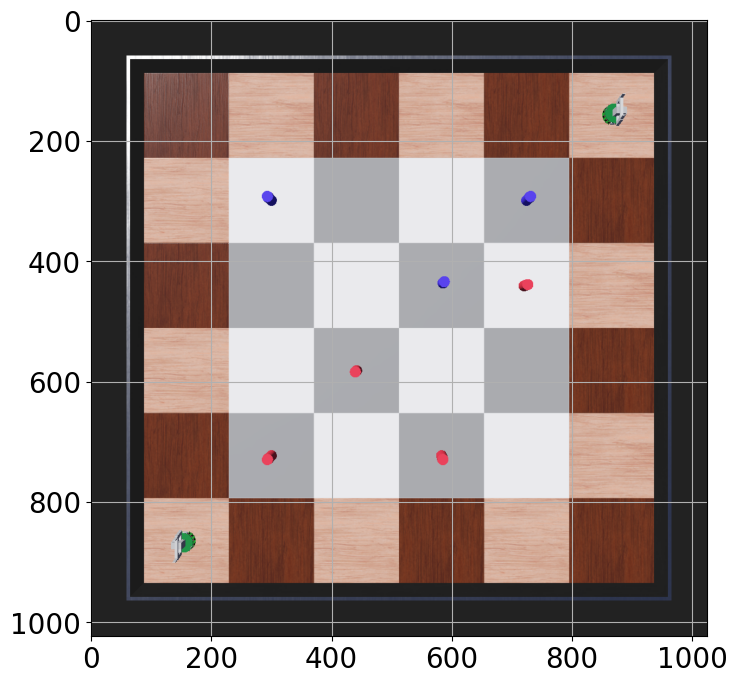

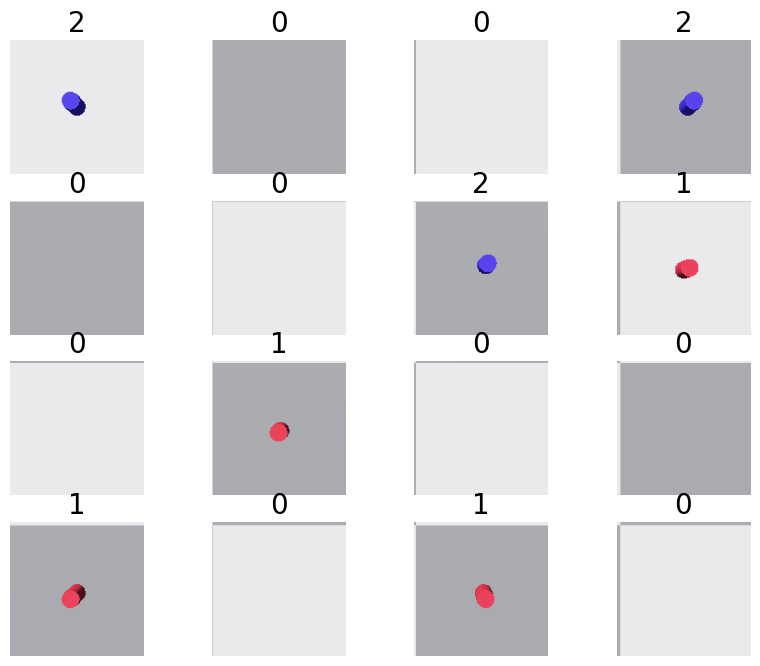

In [20]:
C=CSC()
C.load('board_CSC.json')

filename='images/image_20251203_113954_903464.png'
show_images=True

im=imread(filename)
im=(im*255).astype(uint8)

if show_images:
    figure()
    imshow(im)

count=1
if show_images:
    figure()

state=Board(4,4)
for r in range(4):
    for c in range(4):
        r1=start_r+rows_per_square*r
        r2=start_r+rows_per_square*(r+1)
        c1=start_c+cols_per_square*c
        c2=start_c+cols_per_square*(c+1)
        
        subimage=im[r1:r2,c1:c2]
        vector=subimage.ravel()
        prediction=C.predict(atleast_2d(vector))[0]
        state[r,c]=prediction
        
        if show_images:
            subplot(4,4,count)
            imshow(subimage)
            title(prediction)
            axis('off')
            
        count+=1

state

In [21]:
vector=subimage.ravel()
prediction=C.predict(atleast_2d(vector))[0]
prediction

0

In [22]:
def read_state(filename,show_images=True):
    C=CSC()
    C.load('board_CSC.json')
    
    #filename='images/image_20251203_113954_903464.png'
    #show_images=True
    
    im=imread(filename)
    im=(im*255).astype(uint8)
    
    if show_images:
        figure()
        imshow(im)
    
    count=1
    if show_images:
        figure()
    
    state=Board(4,4)
    for r in range(4):
        for c in range(4):
            r1=start_r+rows_per_square*r
            r2=start_r+rows_per_square*(r+1)
            c1=start_c+cols_per_square*c
            c2=start_c+cols_per_square*(c+1)
            
            subimage=im[r1:r2,c1:c2]
            vector=subimage.ravel()
            prediction=C.predict(atleast_2d(vector))[0]
            state[r,c]=prediction
            
            if show_images:
                subplot(4,4,count)
                imshow(subimage)
                title(prediction)
                axis('off')
                
            count+=1
    
    return state

 0  0  0  2 
 2  2  0  0 
 1  0  2  1 
 0  1  1  0 

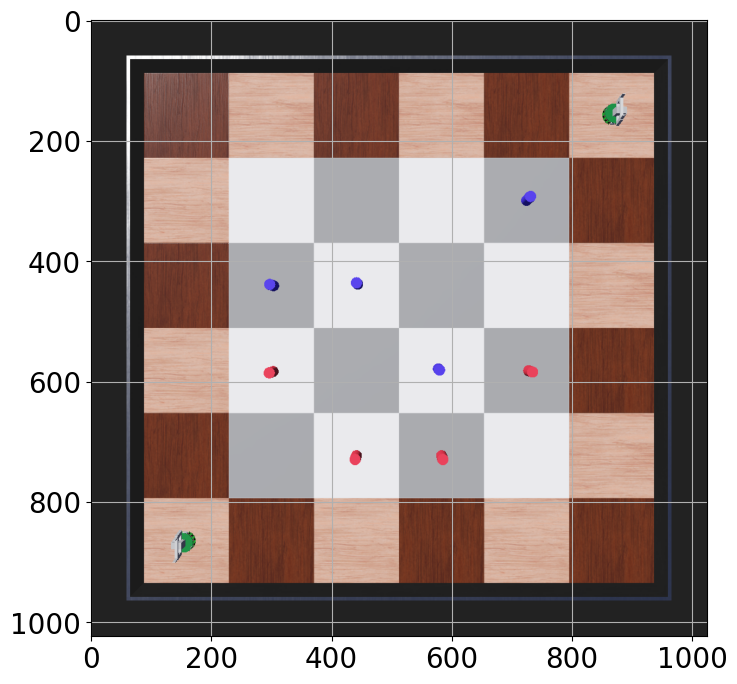

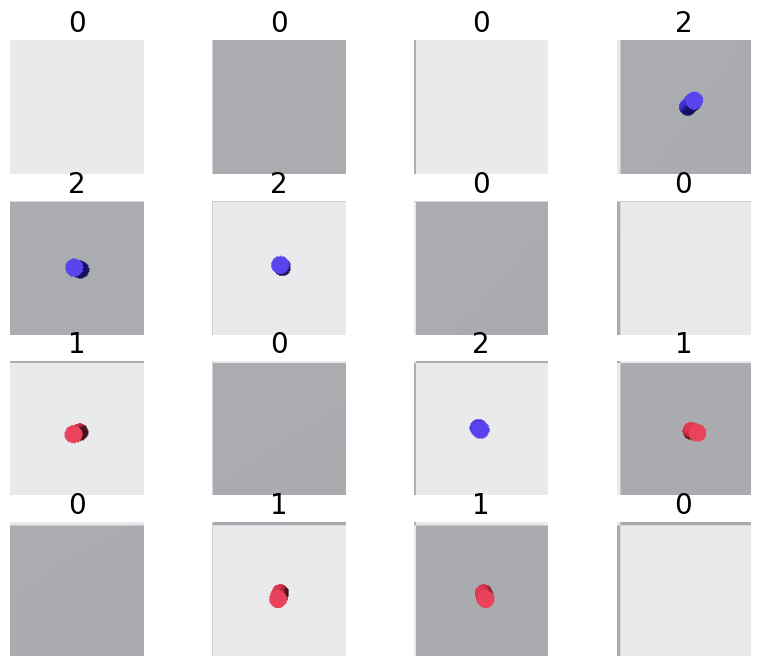

In [23]:
state=read_state('images/image_20251203_122609_275388.png')
state

 0  0  2  2 
 2  0  0  0 
 1  0  0  1 
 0  0  0  0 

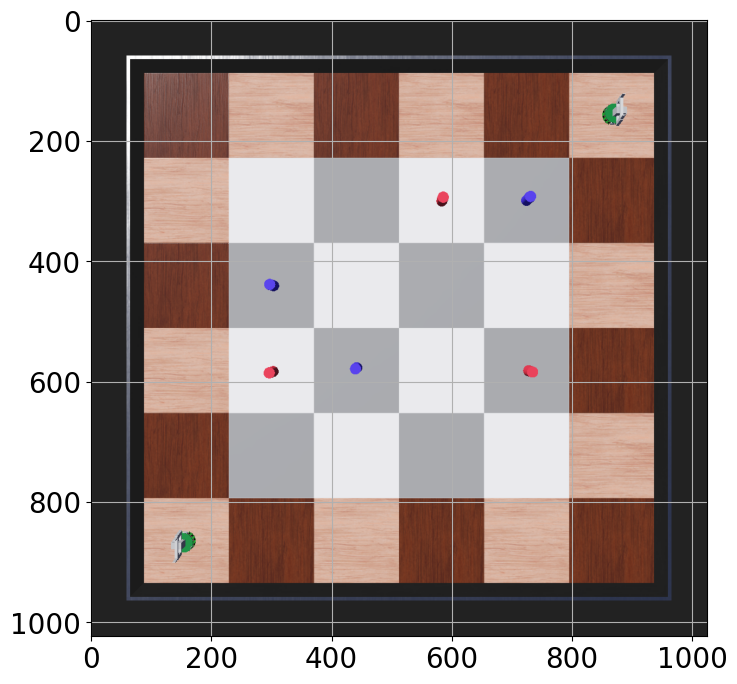

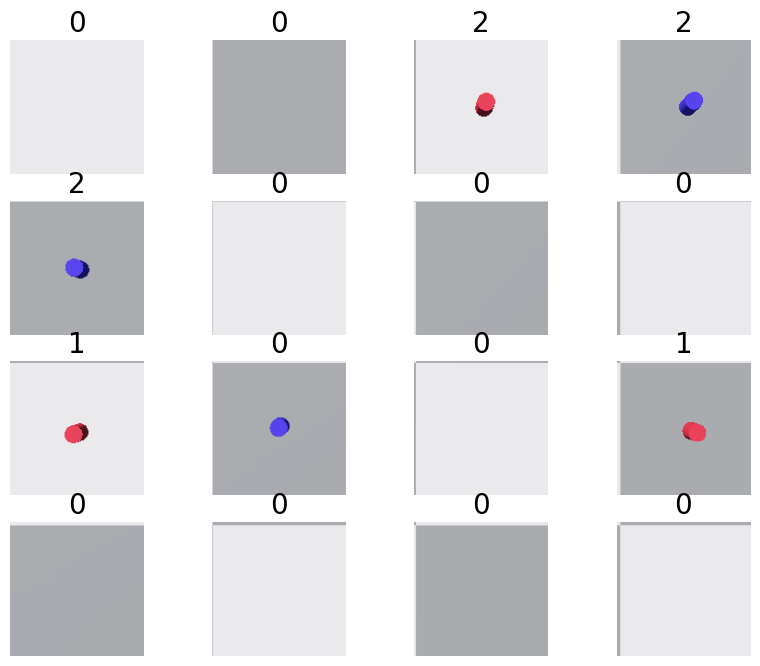

In [24]:
state=read_state('images/image_20251203_122631_269098.png')
state

## Expand the data set (using overhead_camera_controller_make_training_data)

In [29]:
state=Board(4,4)

In [27]:
boards,filenames=[ [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0], [2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0], [1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1], [0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2], [2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1], [2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2], [0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2], [1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2], [0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2], [0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0], [2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2], [0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1], [2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1], [1, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2], [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0], [0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0], [1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0], [1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1], [2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0], [1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2], [1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2], [2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0], [1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2], [0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2]], [ 'images/image_20251203_125729_848048.png', 'images/image_20251203_125737_952002.png', 'images/image_20251203_125743_134550.png', 'images/image_20251203_125744_022887.png', 'images/image_20251203_125744_785817.png', 'images/image_20251203_125745_444042.png', 'images/image_20251203_125746_023339.png', 'images/image_20251203_125746_516601.png', 'images/image_20251203_125746_941338.png', 'images/image_20251203_125747_361682.png', 'images/image_20251203_125747_723223.png', 'images/image_20251203_125748_024448.png', 'images/image_20251203_125748_308801.png', 'images/image_20251203_125748_598215.png', 'images/image_20251203_125748_895790.png', 'images/image_20251203_125749_167104.png', 'images/image_20251203_125749_465823.png', 'images/image_20251203_125749_795364.png', 'images/image_20251203_125750_119634.png', 'images/image_20251203_125750_532111.png', 'images/image_20251203_125750_862133.png', 'images/image_20251203_125751_143759.png', 'images/image_20251203_125751_405947.png', 'images/image_20251203_125752_028923.png', 'images/image_20251203_125753_272266.png']

In [28]:
os.makedirs('images/myboard_extended/player1',exist_ok=True)
os.makedirs('images/myboard_extended/player2',exist_ok=True)
os.makedirs('images/myboard_extended/blank',exist_ok=True)

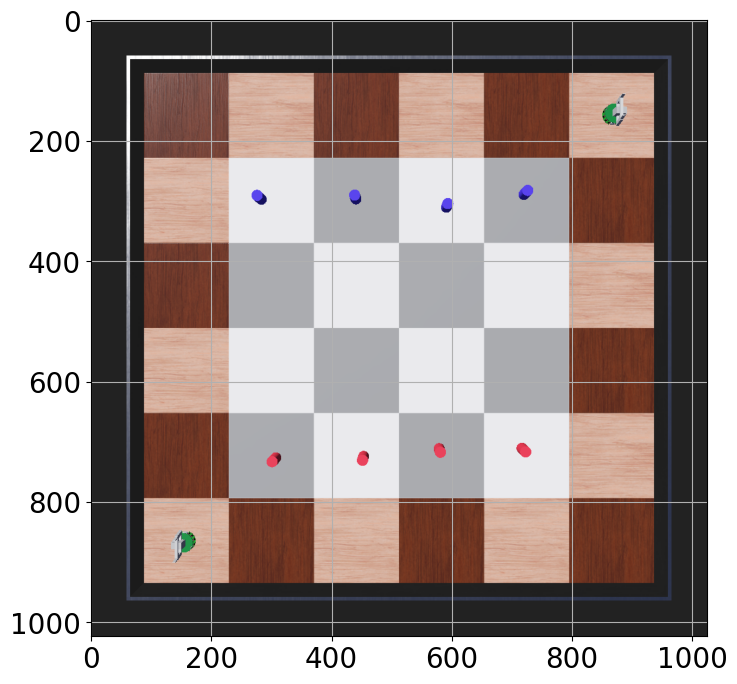

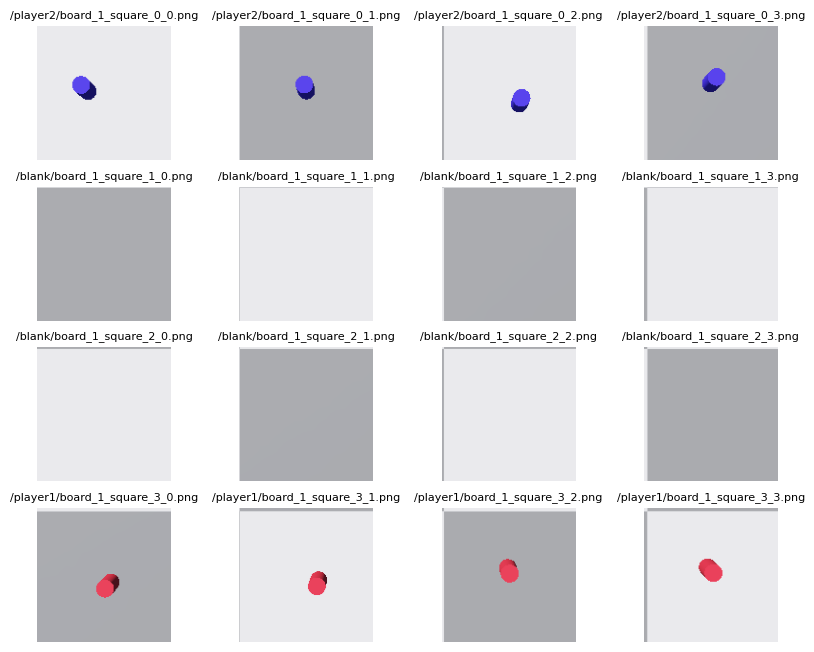

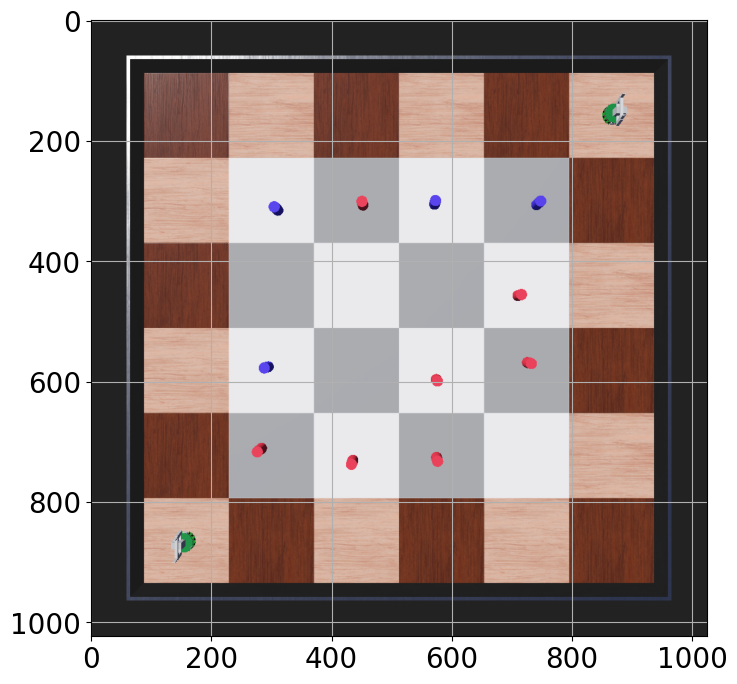

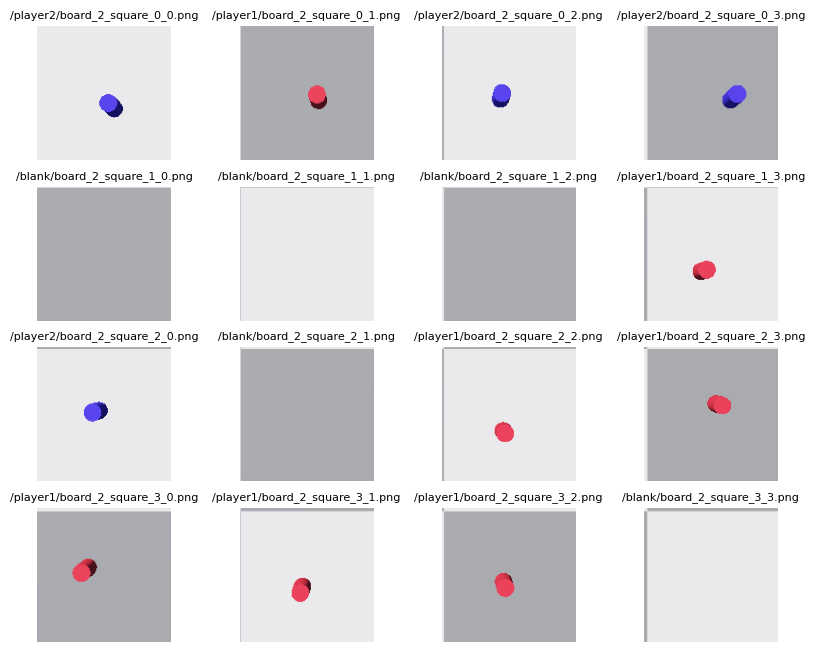

In [30]:
board_count=1
for board,filename in zip(boards,filenames):
    im=imread("images/boards/"+filename)
    im=(im*255).astype(uint8)

    if board_count<3:
        figure()
        imshow(im)

    state.board=board

    count=1
    players=['blank','player1','player2']
    if board_count<3:
        figure()
    for r in range(4):
        for c in range(4):
            r1=start_r+rows_per_square*r
            r2=start_r+rows_per_square*(r+1)
            c1=start_c+cols_per_square*c
            c2=start_c+cols_per_square*(c+1)
            
            subimage=im[r1:r2,c1:c2]
            fname=f'images/myboard_extended/{players[state[r,c]]}/board_{board_count}_square_{r}_{c}.png'
            if board_count<3:
                subplot(4,4,count)
                imshow(subimage)
                title(fname[23:],size=8)
                axis('off')
            count+=1
    
            
            imsave(fname,subimage.astype(uint8))

    board_count+=1
    

In [31]:
images=image.load_images('images/myboard_extended')
# make sure that target 0 = blank, target 1 = player 1, etc...
images=remap_targets(images,new_target_names=['blank','player1','player2'])
summary(images)
data=image.images_to_vectors(images)
C=CSC()
C.fit(data.vectors,data.targets)
C.save('board_CSC.json')

[player1]: 132 files found
[blank]: 131 files found
[player2]: 137 files found
Images
400 images of shape (140, 140, 4)
Target values given.
Target names: 'blank', 'player1', 'player2'
[blank]: 131 files
[player1]: 132 files
[player2]: 137 files
400 vectors of length 78400
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p78395', 'p78396', 'p78397', 'p78398', 'p78399'  (78400 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [207.8125 208.4375 211.8125 ... 202.625  206.125  255.    ]
Median:  [214.  214.5 218.  ... 203.  206.5 255. ]
Stddev:  [23.97190739 23.61664866 23.2304185  ... 31.37649399 30.87651818
  0.        ]


 0  0  0  2 
 2  2  0  0 
 1  0  2  1 
 0  1  1  0 

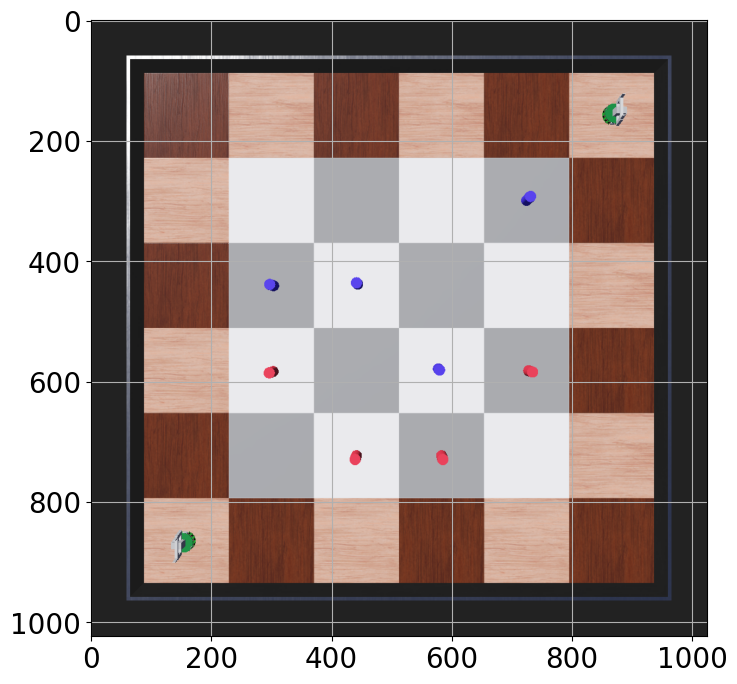

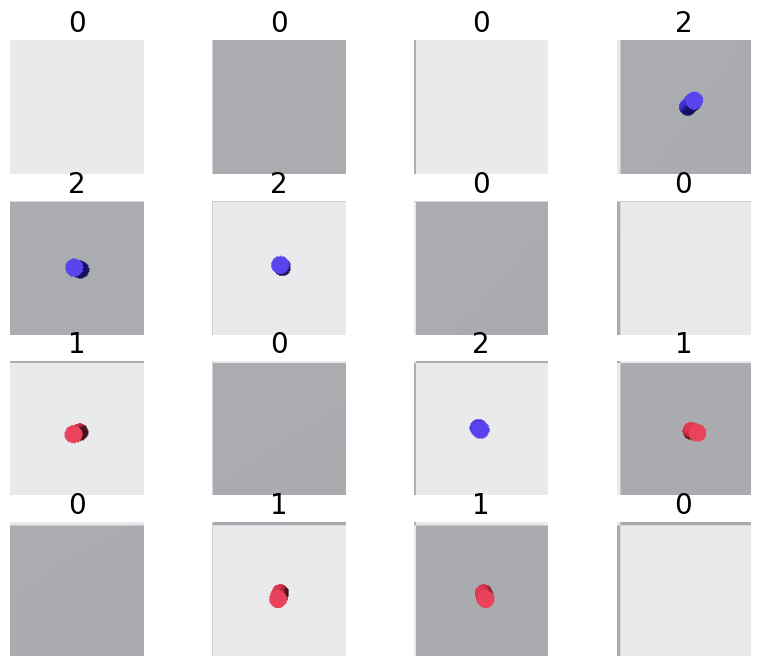

In [33]:
state=read_state('images/image_20251203_122609_275388.png')
state

 0  0  1  2 
 2  0  0  0 
 1  2  0  1 
 0  0  0  0 

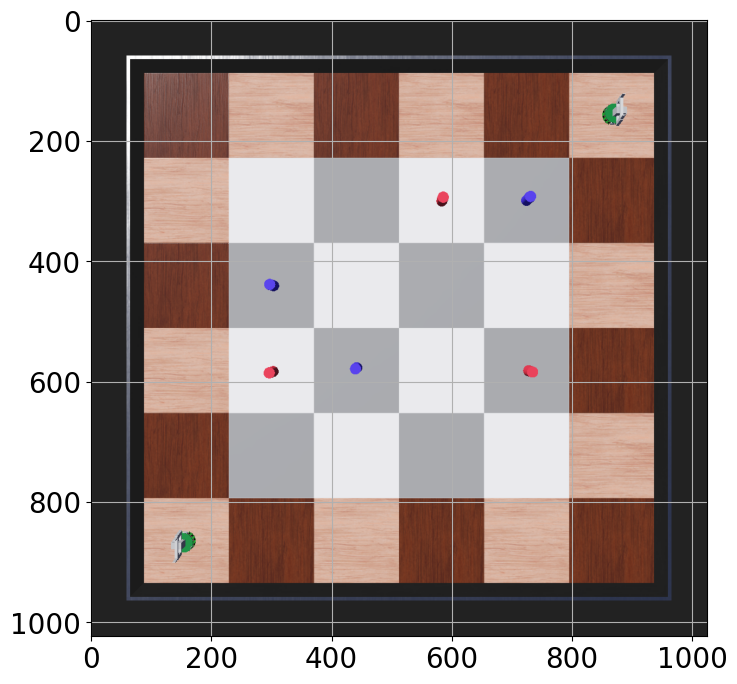

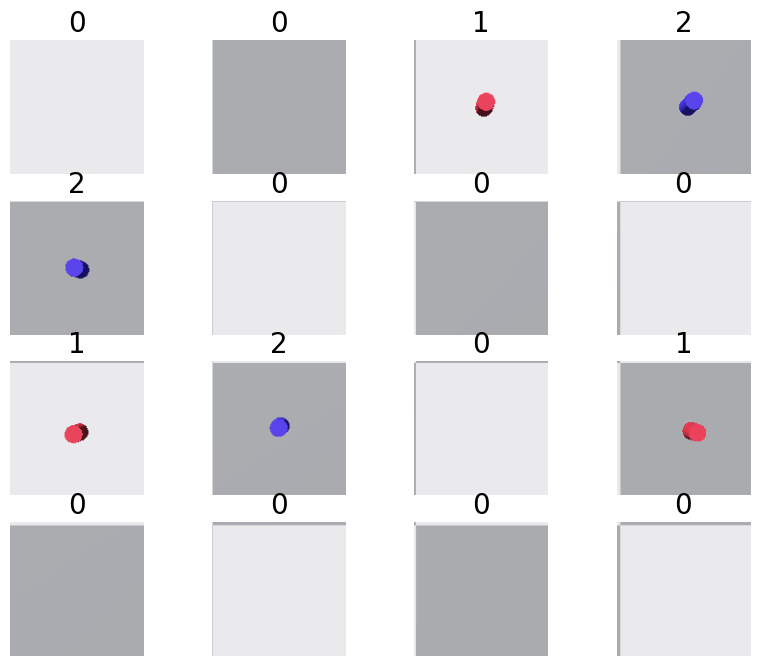

In [34]:
state=read_state('images/image_20251203_122631_269098.png')
state